# ADULT PREDICTION  




##Read the Data

In [122]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [123]:
df = pd.read_csv("adult.csv")

In [124]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


initial check for nulls

In [126]:
df.isna().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
educational-num,0
marital-status,0
occupation,0
relationship,0
race,0
gender,0


In [127]:
df.shape

(48842, 15)

## Drop useless columns Before Splittting the Data

 Dropping columns before the split ensures that both the training and testing sets contain the same structure and features, and it allows you to focus on feature engineering and modeling with only the necessary columns.

No need to remove them after spliting so i did it before since they are useless

In [128]:
df.shape

(48842, 15)

**Notice that the rest of the numeric columns doesn't actually have null values, only "capital-gain" , "capital-loss**

In [129]:
# Select only numeric columns
numeric_columns = df.select_dtypes(include=['number'])

# Loop through each numeric column and count how many zeros are in each column
for col in numeric_columns.columns:
    zero_count = (df[col] == 0).sum()
    print(f"Number of zero values in '{col}': {zero_count}")


Number of zero values in 'age': 0
Number of zero values in 'fnlwgt': 0
Number of zero values in 'educational-num': 0
Number of zero values in 'capital-gain': 44807
Number of zero values in 'capital-loss': 46560
Number of zero values in 'hours-per-week': 0


In [130]:
# df.drop(columns=['capital-gain', 'capital-loss'], inplace=True)

## Data Splitting

**Splitting the data to ensure Proper Generalization and Prevent Data Leakage.**

In [131]:
from sklearn.model_selection import train_test_split

# Assuming 'df' is your entire dataset, including both features and target
train, test = train_test_split(df, test_size=0.2, random_state=42)

# Display the shapes of the resulting splits
print(f"Train set shape: {train.shape}")
print(f"Test set shape: {test.shape}")


Train set shape: (39073, 15)
Test set shape: (9769, 15)


## Data Cleaning

**Notice here that there is missing values in some columns, it's in the shape of "?"**

In [132]:
train[10:15]

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
19854,19,?,365871,7th-8th,4,Never-married,?,Not-in-family,White,Male,0,0,40,Mexico,<=50K
28918,70,Self-emp-inc,131699,Bachelors,13,Divorced,Exec-managerial,Unmarried,White,Female,0,0,55,United-States,<=50K
43176,31,Local-gov,83671,Some-college,10,Never-married,Adm-clerical,Not-in-family,Black,Female,0,0,40,United-States,<=50K
33920,51,State-gov,94174,Some-college,10,Divorced,Adm-clerical,Unmarried,White,Female,0,0,35,United-States,<=50K
21968,71,?,250263,Some-college,10,Married-civ-spouse,?,Husband,White,Male,3432,0,30,United-States,<=50K


###identify duplicates and drop them from Train data

In [133]:
train_duplicates = train[train.duplicated()]
# train_duplicates

In [134]:
X_train_duplicates_count = train.duplicated().sum()
X_train_duplicates_count

32

In [135]:
train.drop_duplicates(inplace=True)

In [136]:
train.duplicated().sum()

0

### Handling Missing Values




*   **Checking the categories in each non-numerical column, to see how much "?" invaded the columns**
*   **and also to check the ratio of each category in it's column**



In [137]:
# Select only object (categorical) columns
categorical_columns = train.select_dtypes(include=['object'])

# Loop through each object column and display the category and its count
for col in categorical_columns:
    print(f"Value counts for '{col}':")
    print(train[col].value_counts())
    print("\n")


Value counts for 'workclass':
workclass
Private             27094
Self-emp-not-inc     3060
Local-gov            2499
?                    2262
State-gov            1578
Self-emp-inc         1376
Federal-gov          1145
Without-pay            18
Never-worked            9
Name: count, dtype: int64


Value counts for 'education':
education
HS-grad         12602
Some-college     8747
Bachelors        6391
Masters          2126
Assoc-voc        1648
11th             1464
Assoc-acdm       1266
10th             1105
7th-8th           755
Prof-school       666
9th               594
12th              515
Doctorate         480
5th-6th           418
1st-4th           198
Preschool          66
Name: count, dtype: int64


Value counts for 'marital-status':
marital-status
Married-civ-spouse       17968
Never-married            12827
Divorced                  5296
Separated                 1211
Widowed                   1211
Married-spouse-absent      499
Married-AF-spouse           29
Name: count

In [138]:
print(train.shape)
print(test.shape)

(39041, 15)
(9769, 15)


In [139]:
# Replace '?' with NaN
train.replace('?', np.nan, inplace=True)


In [140]:
#Checking for Missing Values
missing_values = train.isnull().sum()
missing_values

,0
age,0
workclass,2262
fnlwgt,0
education,0
educational-num,0
marital-status,0
occupation,2271
relationship,0
race,0
gender,0


In [141]:
# Drop rows with any NaN values
train_cleaned = train.dropna()


In [142]:
#Data size before and after dropping nulls
print(train.shape)
print(train_cleaned.shape)

(39041, 15)
(36134, 15)


## Encoding

Check how many category in each column

In [143]:
# Select only object (categorical) columns
categorical_columns = train_cleaned.select_dtypes(include=['object'])

# Loop through each object column and display the category and its count
for col in categorical_columns:
    print(f"Value counts for '{col}':")
    print(train_cleaned[col].value_counts())
    print("\n")


Value counts for 'workclass':
workclass
Private             26624
Self-emp-not-inc     3009
Local-gov            2473
State-gov            1550
Self-emp-inc         1337
Federal-gov          1123
Without-pay            18
Name: count, dtype: int64


Value counts for 'education':
education
HS-grad         11803
Some-college     7949
Bachelors        6036
Masters          2016
Assoc-voc        1573
11th             1299
Assoc-acdm       1190
10th              967
7th-8th           656
Prof-school       624
9th               533
12th              448
Doctorate         436
5th-6th           370
1st-4th           178
Preschool          56
Name: count, dtype: int64


Value counts for 'marital-status':
marital-status
Married-civ-spouse       16910
Never-married            11582
Divorced                  5030
Separated                 1122
Widowed                   1018
Married-spouse-absent      446
Married-AF-spouse           26
Name: count, dtype: int64


Value counts for 'occupation':
occu

In [144]:
# Reset index of the DataFrame (drop=True prevents the old index from becoming a new column)
train_cleaned = train_cleaned.reset_index(drop=True)

#### One hot encoding to columns with 2 up to 7 categories


In [145]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Initialize the OneHotEncoder
encoder = OneHotEncoder(drop='first', sparse_output=False)

# Apply OneHotEncoder to the columns you want to encode
encoded_columns = encoder.fit_transform(train_cleaned[['workclass', 'marital-status', 'relationship', 'race', 'gender', 'income']])

# Get the column names for the encoded data
encoded_column_names = encoder.get_feature_names_out(['workclass', 'marital-status', 'relationship', 'race', 'gender', 'income'])

# Convert encoded data to DataFrame
encoded_df = pd.DataFrame(encoded_columns, columns=encoded_column_names)

# Concatenate the encoded columns back into the original DataFrame (and drop the original columns)
df_final = pd.concat([train_cleaned.drop(columns=['workclass', 'marital-status', 'relationship', 'race', 'gender', 'income']), encoded_df], axis=1)


In [146]:
print(train_cleaned.shape)
print(df_final.shape)

(36134, 15)
(36134, 32)


In [147]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36134 entries, 0 to 36133
Data columns (total 32 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   age                                   36134 non-null  int64  
 1   fnlwgt                                36134 non-null  int64  
 2   education                             36134 non-null  object 
 3   educational-num                       36134 non-null  int64  
 4   occupation                            36134 non-null  object 
 5   capital-gain                          36134 non-null  int64  
 6   capital-loss                          36134 non-null  int64  
 7   hours-per-week                        36134 non-null  int64  
 8   native-country                        36134 non-null  object 
 9   workclass_Local-gov                   36134 non-null  float64
 10  workclass_Private                     36134 non-null  float64
 11  workclass_Self-

#### Target or Mean Encoding

For columns with many categories when dealing with models that can interpret numeric features, such as logistic regression or linear regression.

In [148]:
# List of object columns to encode
object_columns = ['occupation', 'education', 'native-country']


# Apply target encoding for each object column
for col in object_columns:
    mean_encoded = df_final.groupby(col)['income_>50K'].mean()  # Compute mean of the target column
    df_final[col + '_encoded'] = df_final[col].map(mean_encoded)  # Create a new encoded column

# Drop the original columns that were encoded
df_final.drop(columns=object_columns, inplace=True)

# Rename the new encoded columns to the original column names (optional)
df_final.rename(columns={col + '_encoded': col for col in object_columns}, inplace=True)


In [149]:
df_final

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,relationship_Wife,race_Asian-Pac-Islander,race_Black,race_Other,race_White,gender_Male,income_>50K,occupation,education,native-country
0,42,145175,10,0,0,40,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.125000,0.204302,0.254803
1,52,175029,6,0,0,35,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.224088,0.067218,0.254803
2,34,172664,9,0,0,40,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.224088,0.165128,0.254803
3,28,125791,9,0,0,40,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.137923,0.165128,0.254803
4,46,28419,11,0,0,50,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.209467,0.254291,0.254803
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36129,36,635913,9,0,0,40,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.042162,0.165128,0.254803
36130,34,107624,10,0,0,50,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.224088,0.204302,0.254803
36131,28,250135,10,0,0,40,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.478270,0.204302,0.254803
36132,46,96652,11,0,0,40,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.137923,0.254291,0.254803


In [150]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36134 entries, 0 to 36133
Data columns (total 32 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   age                                   36134 non-null  int64  
 1   fnlwgt                                36134 non-null  int64  
 2   educational-num                       36134 non-null  int64  
 3   capital-gain                          36134 non-null  int64  
 4   capital-loss                          36134 non-null  int64  
 5   hours-per-week                        36134 non-null  int64  
 6   workclass_Local-gov                   36134 non-null  float64
 7   workclass_Private                     36134 non-null  float64
 8   workclass_Self-emp-inc                36134 non-null  float64
 9   workclass_Self-emp-not-inc            36134 non-null  float64
 10  workclass_State-gov                   36134 non-null  float64
 11  workclass_Witho



## Handling Outliers

In [151]:
train_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36134 entries, 0 to 36133
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              36134 non-null  int64 
 1   workclass        36134 non-null  object
 2   fnlwgt           36134 non-null  int64 
 3   education        36134 non-null  object
 4   educational-num  36134 non-null  int64 
 5   marital-status   36134 non-null  object
 6   occupation       36134 non-null  object
 7   relationship     36134 non-null  object
 8   race             36134 non-null  object
 9   gender           36134 non-null  object
 10  capital-gain     36134 non-null  int64 
 11  capital-loss     36134 non-null  int64 
 12  hours-per-week   36134 non-null  int64 
 13  native-country   36134 non-null  object
 14  income           36134 non-null  object
dtypes: int64(6), object(9)
memory usage: 4.1+ MB


### Box plots and z_score

Initial identification for outliers
age
- The age distribution appears to be moderately spread, with most people between the ages of 28 and 47.
- A small proportion of the population is younger than 17 or older than 90.
- This suggests a balanced dataset with some possible outliers at the upper end (e.g., individuals aged 90).

fnlwgt **Note: i removed it later so i didn't bother to remove outliers from it**
- Mean: The average value for fnlwgt is approximately 189,838.
- Standard Deviation: The spread is quite large at 105,485, meaning the values for fnlwgt vary significantly from person to person.
- Max: The maximum value is 1,484,705, which is very high and indicates some extreme outliers in this column
- high variability due to the large standard deviation suggests that there are people with very different sample weights, possibly skewing the distribution.

educational-num
- Mean: The average educational number is about 10.12 years of education.
- std suggests that data is centered arounf mean (10 years), with most ppl have between 9 and 13 years of education, which likely reflects high school to early college-level education.
- some people having much lower or higher levels of education (e.g., 1 year or 16 years).

Hours-per-week
- Min: The minimum value is 1 hour per week, which could indicate part-time work or even data entry errors.

- Mean: The average number of hours worked per week is about 40.97 hours,and most quartiles are located around that.

- Max: The maximum value is 99 hours per week, which could indicate some extreme outliers or unusual cases of people working very long hours.

In [152]:
train_cleaned.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,36134.000000,3.613400e+04,36134.000000,36134.000000,36134.000000,36134.000000
mean,38.545774,1.898313e+05,10.118393,1095.883434,90.559556,40.965130
std,13.210858,1.054808e+05,2.552737,7486.593728,408.587173,12.066993
min,17.000000,1.349200e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175832e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.782085e+05,10.000000,0.000000,0.000000,40.000000
75%,47.000000,2.381880e+05,13.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


####Age

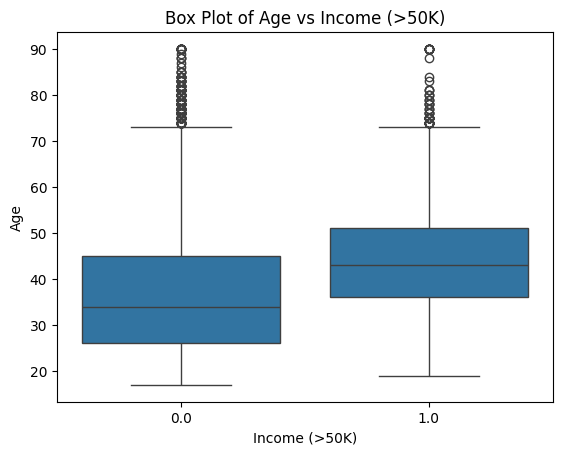

In [153]:
import seaborn as sns

# Box plot of age vs binary income_>50K
sns.boxplot(x='income_>50K', y='age', data=df_final)

# Add labels and title
plt.title('Box Plot of Age vs Income (>50K)')
plt.xlabel('Income (>50K)')
plt.ylabel('Age')

plt.show()


In [154]:
# Step 1: Calculate the Z-score for the 'age' column
df_final['age_zscore'] = (df_final['age'] - df_final['age'].mean()) / df_final['age'].std()

# Step 2: Set the threshold (Z-score greater than 3 or less than -3)
threshold = 3

# Step 3: Identify outliers
age_outliers = df_final[np.abs(df_final['age_zscore']) > threshold]

# Display the outliers
print(age_outliers.shape)


(127, 33)


In [155]:
age_outliers

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,race_Asian-Pac-Islander,race_Black,race_Other,race_White,gender_Male,income_>50K,occupation,education,native-country,age_zscore
673,80,252466,11,0,0,24,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.224088,0.254291,0.254803,3.137890
1385,84,241065,14,0,0,66,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.457741,0.553571,0.254803,3.440672
2062,90,221832,13,0,0,45,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.478270,0.424950,0.254803,3.894844
2191,90,225063,9,0,0,40,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.224088,0.165128,0.202532,3.894844
2197,80,26865,4,0,0,20,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.117953,0.057927,0.254803,3.137890
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35149,82,132870,9,0,4356,18,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.478270,0.165128,0.254803,3.289281
35326,80,225892,9,1409,0,40,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.042162,0.165128,0.254803,3.137890
35369,90,311184,14,0,0,99,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.457741,0.553571,0.254803,3.894844
35541,82,71438,9,0,0,20,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.117953,0.165128,0.254803,3.289281


In [156]:
# Step 1: Get the indices of the outliers from age_outliers
outlier_indices = age_outliers.index

# Step 2: Drop the outlier records from final_df based on these indices
df_final = df_final.drop(outlier_indices)

In [157]:
# Q1 = df_final['age'].quantile(0.25)
# Q3 = df_final['age'].quantile(0.75)

# # Calculate the Interquartile Range (IQR)
# IQR = Q3 - Q1

# # Define the lower and upper bounds for outliers
# lower_bound = Q1 - 1.5 * IQR
# upper_bound = Q3 + 1.5 * IQR

# df_cleaned = df_final[(df_final['age'] >= lower_bound) & (df_final['age'] <= upper_bound)]

In [158]:
df_final
# df_cleaned

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,race_Asian-Pac-Islander,race_Black,race_Other,race_White,gender_Male,income_>50K,occupation,education,native-country,age_zscore
0,42,145175,10,0,0,40,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.125000,0.204302,0.254803,0.261469
1,52,175029,6,0,0,35,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.224088,0.067218,0.254803,1.018422
2,34,172664,9,0,0,40,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.224088,0.165128,0.254803,-0.344094
3,28,125791,9,0,0,40,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.137923,0.165128,0.254803,-0.798266
4,46,28419,11,0,0,50,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.209467,0.254291,0.254803,0.564250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36129,36,635913,9,0,0,40,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.042162,0.165128,0.254803,-0.192703
36130,34,107624,10,0,0,50,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.224088,0.204302,0.254803,-0.344094
36131,28,250135,10,0,0,40,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.478270,0.204302,0.254803,-0.798266
36132,46,96652,11,0,0,40,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.137923,0.254291,0.254803,0.564250


In [159]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36007 entries, 0 to 36133
Data columns (total 33 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   age                                   36007 non-null  int64  
 1   fnlwgt                                36007 non-null  int64  
 2   educational-num                       36007 non-null  int64  
 3   capital-gain                          36007 non-null  int64  
 4   capital-loss                          36007 non-null  int64  
 5   hours-per-week                        36007 non-null  int64  
 6   workclass_Local-gov                   36007 non-null  float64
 7   workclass_Private                     36007 non-null  float64
 8   workclass_Self-emp-inc                36007 non-null  float64
 9   workclass_Self-emp-not-inc            36007 non-null  float64
 10  workclass_State-gov                   36007 non-null  float64
 11  workclass_Without-pa

####educational-num

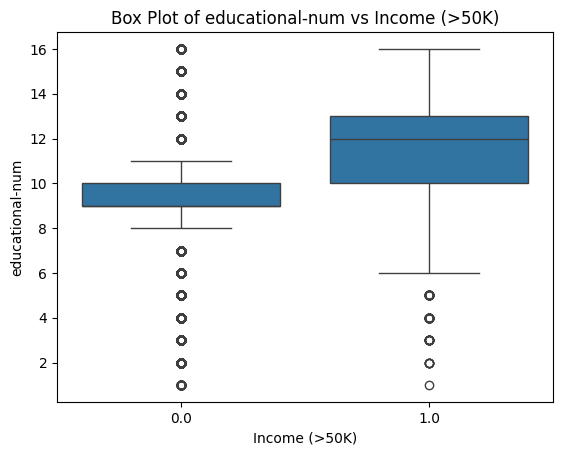

In [160]:
import seaborn as sns

# Box plot of age vs binary income_>50K
sns.boxplot(x='income_>50K', y='educational-num', data=df_final)

# Add labels and title
plt.title('Box Plot of educational-num vs Income (>50K)')
plt.xlabel('Income (>50K)')
plt.ylabel('educational-num')

plt.show()


In [161]:
# Step 1: Calculate the Z-score for the 'educational-num' column
df_final['educational-num_zscore'] = (df_final['educational-num'] - df_final['educational-num'].mean()) / df_final['educational-num'].std()

# Step 2: Set the threshold (Z-score greater than 3 or less than -3)
threshold = 3

# Step 3: Identify outliers
educational_num_outliers = df_final[np.abs(df_final['educational-num_zscore']) > threshold]

# Display the outliers
print(educational_num_outliers.shape)

(230, 34)


In [162]:
# Step 1: Get the indices of the outliers from age_outliers
outlier_indices = educational_num_outliers.index

# Step 2: Drop the outlier records from final_df based on these indices
df_final = df_final.drop(outlier_indices)

In [163]:
# Q1 = df_final['educational-num'].quantile(0.25)
# Q3 = df_final['educational-num'].quantile(0.75)

# # Calculate the Interquartile Range (IQR)
# IQR = Q3 - Q1

# # Define the lower and upper bounds for outliers
# lower_bound = Q1 - 1.5 * IQR
# upper_bound = Q3 + 1.5 * IQR

# df_cleaned = df_final[(df_final['educational-num'] >= lower_bound) & (df_final['educational-num'] <= upper_bound)]

In [164]:
df_final.shape
# df_cleaned.shape

(35777, 34)

#### hours-per-week

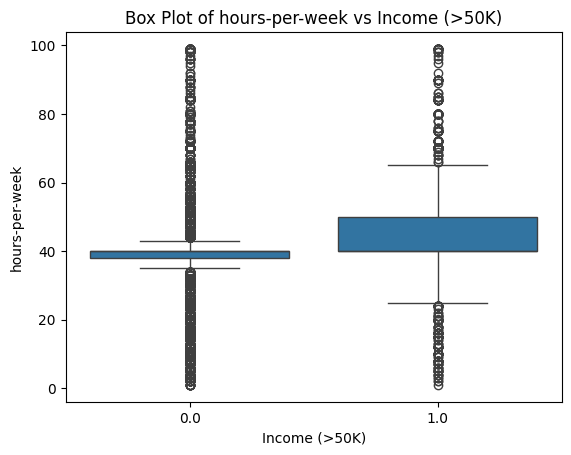

In [165]:
import seaborn as sns

# Box plot of age vs binary income_>50K
sns.boxplot(x='income_>50K', y='hours-per-week', data=df_final)

# Add labels and title
plt.title('Box Plot of hours-per-week vs Income (>50K)')
plt.xlabel('Income (>50K)')
plt.ylabel('hours-per-week')

plt.show()


In [166]:
# Step 1: Calculate the Z-score for the 'hours-per-week' column
df_final['hours-per-week_zscore'] = (df_final['hours-per-week'] - df_final['hours-per-week'].mean()) / df_final['hours-per-week'].std()

# Step 2: Set the threshold (Z-score greater than 3 or less than -3)
threshold = 3

# Step 3: Identify outliers
hpw_outliers = df_final[np.abs(df_final['hours-per-week_zscore']) > threshold]

# Display the outliers
print(hpw_outliers.shape)

(499, 35)


In [167]:
# Step 1: Get the indices of the outliers from age_outliers
outlier_indices = hpw_outliers.index

# Step 2: Drop the outlier records from final_df based on these indices
df_final = df_final.drop(outlier_indices)

In [168]:
# Q1 = df_final['hours-per-week'].quantile(0.25)
# Q3 = df_final['hours-per-week'].quantile(0.75)

# # Calculate the Interquartile Range (IQR)
# IQR = Q3 - Q1

# # Define the lower and upper bounds for outliers
# lower_bound = Q1 - 1.5 * IQR
# upper_bound = Q3 + 1.5 * IQR

# df_cleaned = df_final[(df_final['hours-per-week'] >= lower_bound) & (df_final['hours-per-week'] <= upper_bound)]

In [169]:
df_final.shape

(35278, 35)

In [170]:
# df_final.info()

no longer need for z-score columns so lets drop them

In [171]:
df_final = df_final.drop(columns=['age_zscore','educational-num_zscore', 'hours-per-week_zscore'])

In [172]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35278 entries, 0 to 36133
Data columns (total 32 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   age                                   35278 non-null  int64  
 1   fnlwgt                                35278 non-null  int64  
 2   educational-num                       35278 non-null  int64  
 3   capital-gain                          35278 non-null  int64  
 4   capital-loss                          35278 non-null  int64  
 5   hours-per-week                        35278 non-null  int64  
 6   workclass_Local-gov                   35278 non-null  float64
 7   workclass_Private                     35278 non-null  float64
 8   workclass_Self-emp-inc                35278 non-null  float64
 9   workclass_Self-emp-not-inc            35278 non-null  float64
 10  workclass_State-gov                   35278 non-null  float64
 11  workclass_Without-pa

## Feature Scaling

### Standardization

In [173]:
df_final.head()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,relationship_Wife,race_Asian-Pac-Islander,race_Black,race_Other,race_White,gender_Male,income_>50K,occupation,education,native-country
0,42,145175,10,0,0,40,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.125000,0.204302,0.254803
1,52,175029,6,0,0,35,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.224088,0.067218,0.254803
2,34,172664,9,0,0,40,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.224088,0.165128,0.254803
3,28,125791,9,0,0,40,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.137923,0.165128,0.254803
4,46,28419,11,0,0,50,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.209467,0.254291,0.254803


In [174]:
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
scaler = StandardScaler()

# Apply standardization to your dataset (excluding target variable)
df_scaled = scaler.fit_transform(df_final.drop(columns=['income_>50K']))

# Convert back to DataFrame
x_train_scaled = pd.DataFrame(df_scaled, columns=df_final.drop(columns=['income_>50K']).columns)

# With No Standardization
# x_train_scaled = df_final.drop(columns=['income_>50K'])

In [175]:
x_train_scaled.head()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,relationship_Unmarried,relationship_Wife,race_Asian-Pac-Islander,race_Black,race_Other,race_White,gender_Male,occupation,education,native-country
0,0.286533,-0.424129,-0.070682,-0.146171,-0.221677,-0.054044,-0.271927,0.593610,-0.193562,-0.295268,...,-0.344674,-0.220168,-0.172116,-0.318441,-0.0865,0.399813,0.695129,-0.835093,-0.296503,0.113305
1,1.060452,-0.140478,-1.695128,-0.146171,-0.221677,-0.515976,-0.271927,-1.684608,-0.193562,3.386758,...,-0.344674,-0.220168,-0.172116,-0.318441,-0.0865,0.399813,0.695129,-0.173528,-1.172954,0.113305
2,-0.332602,-0.162949,-0.476794,-0.146171,-0.221677,-0.054044,3.677455,-1.684608,-0.193562,-0.295268,...,-0.344674,-0.220168,-0.172116,-0.318441,-0.0865,0.399813,0.695129,-0.173528,-0.546968,0.113305
3,-0.796954,-0.608302,-0.476794,-0.146171,-0.221677,-0.054044,-0.271927,0.593610,-0.193562,-0.295268,...,-0.344674,-0.220168,-0.172116,-0.318441,-0.0865,0.399813,-1.438583,-0.748810,-0.546968,0.113305
4,0.596101,-1.533461,0.335429,-0.146171,-0.221677,0.869819,-0.271927,0.593610,-0.193562,-0.295268,...,-0.344674,-0.220168,-0.172116,-0.318441,-0.0865,0.399813,0.695129,-0.271146,0.023101,0.113305


### Normalization

In [176]:
# from sklearn.preprocessing import MinMaxScaler

# # Initialize MinMaxScaler for normalization
# scaler = MinMaxScaler()

# # Apply normalization to your dataset (excluding the target variable)
# df_normalized = scaler.fit_transform(df_final.drop(columns=['income_>50K']))

# # Convert back to DataFrame
# x_train_scaled = pd.DataFrame(df_normalized, columns=df_final.drop(columns=['income_>50K']).columns)

In [177]:
y_train = df_final['income_>50K']

In [178]:
print(x_train_scaled.shape)
print(y_train.shape)

(35278, 31)
(35278,)


## Feature Engineering

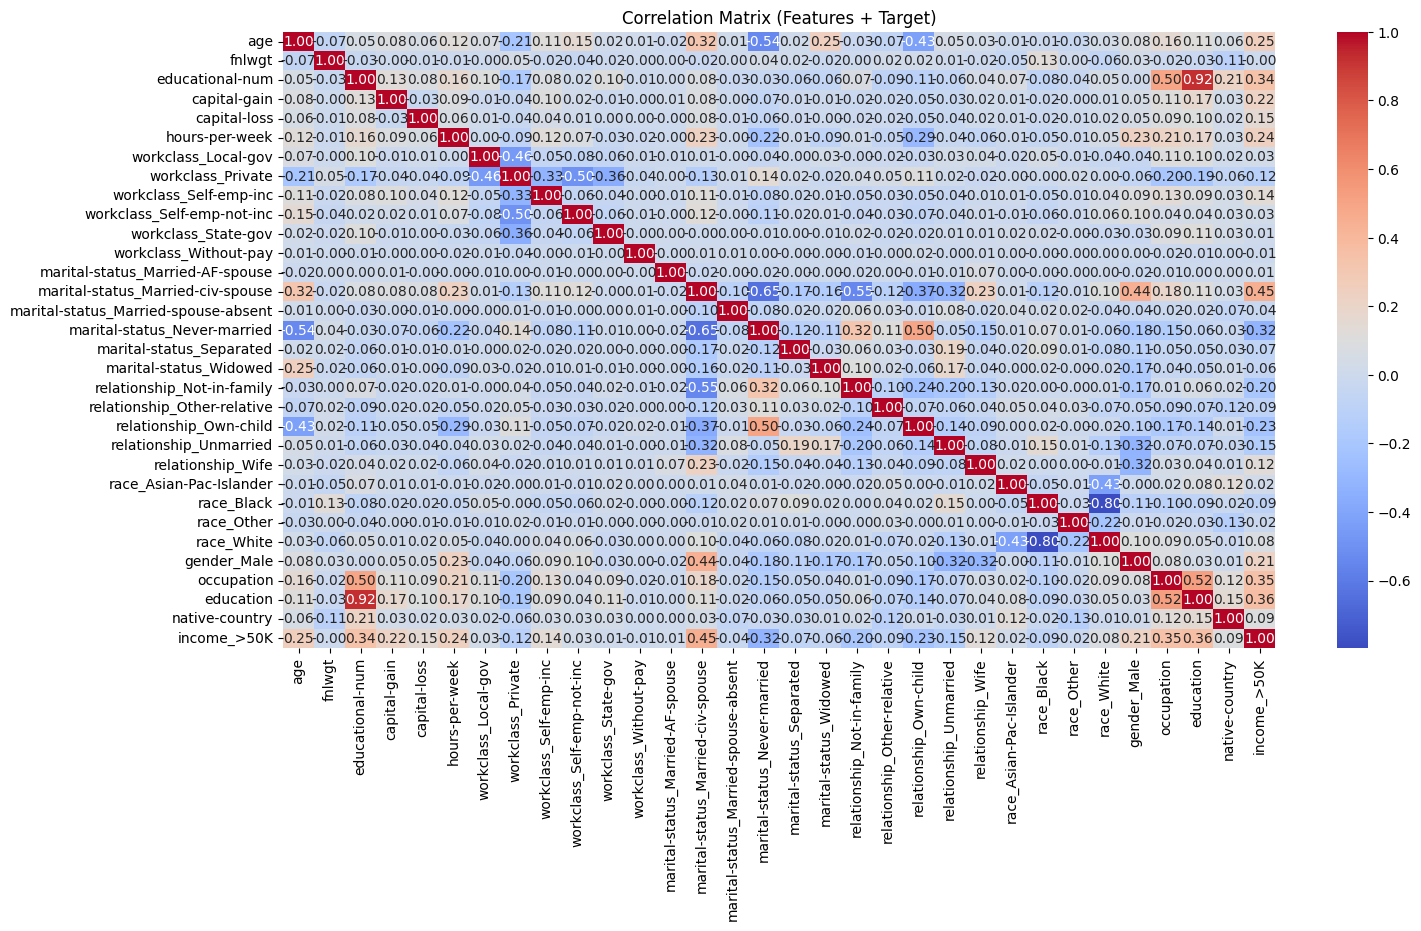

In [179]:
# Step 1: Convert X_train_scaled to a DataFrame (assuming you have the original feature names)
X_train_scaled_df = pd.DataFrame(x_train_scaled, columns=x_train_scaled.columns)

# Step 2: Concatenate X_train_scaled with y_train
combined_df = pd.concat([X_train_scaled_df, y_train.reset_index(drop=True)], axis=1)

# Step 3: Calculate the correlation matrix
corr_matrix = combined_df.corr()

# Step 4: Plot the correlation matrix
plt.figure(figsize=(16, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix (Features + Target)")
plt.show()


- since education and educational-num are have a very high positive correlation, no need to combine them as they are nearly identical.
- lets drop the one that improve final accuracy **"education"**

**low correlation with the output**
The correlation between ['workclass_State-gov', 'fnlwgt','workclass_Without-pay']  and income_>50K is extremely low. These features don’t seem to provide useful information for predicting income.

In [180]:
# Drop 'educational-num' and 'fnlwgt' from the scaled DataFrame
x_train_scaled_2= X_train_scaled_df.drop(columns=['education'])
# x_train_scaled_2.head()


In [181]:
correlation = combined_df.corr()['income_>50K'].sort_values(ascending=False)
print(correlation)

income_>50K                             1.000000
marital-status_Married-civ-spouse       0.449441
education                               0.363915
occupation                              0.347003
educational-num                         0.335644
age                                     0.251322
hours-per-week                          0.239681
capital-gain                            0.219001
gender_Male                             0.214249
capital-loss                            0.152519
workclass_Self-emp-inc                  0.139230
relationship_Wife                       0.124829
native-country                          0.094003
race_White                              0.078270
workclass_Local-gov                     0.027345
workclass_Self-emp-not-inc              0.025457
race_Asian-Pac-Islander                 0.019908
marital-status_Married-AF-spouse        0.011655
workclass_State-gov                     0.010085
fnlwgt                                 -0.003143
workclass_Without-pa

In [182]:
# Define the columns to drop
columns_to_drop = ['workclass_State-gov', 'fnlwgt','workclass_Without-pay']

# Drop the columns from the DataFrame
x_train_scaled_2 = x_train_scaled_2.drop(columns=columns_to_drop)

In [183]:
# x_train_scaled_2.info()

#### Combining Features

In [184]:
# x_train_scaled_2['net_capital'] = x_train_scaled_2['capital-gain'] * x_train_scaled_2['capital-loss']

# # Drop the original 'capital-gain' and 'capital-loss' columns
# x_train_scaled_3 = x_train_scaled_2.drop(columns=['capital-gain', 'capital-loss'])

In [185]:
# Define the columns that are considered 'Married' and 'Not-Married'
# married_columns = ['marital-status_Married-AF-spouse', 'marital-status_Married-civ-spouse', 'marital-status_Married-spouse-absent']
# not_married_columns = ['marital-status_Never-married', 'marital-status_Separated', 'marital-status_Widowed']

# # Create the 'marital_group' column
# x_train_scaled_2['marital_group'] = x_train_scaled_2[married_columns].sum(axis=1).apply(lambda x: 'Married' if x > 0 else 'Not-Married')

# # Drop the original six marital status columns
# x_train_scaled_3 = x_train_scaled_2.drop(columns=married_columns + not_married_columns)

In [186]:
# # Apply OneHotEncoder to the 'marital_group' column
# encoder = OneHotEncoder(drop='first', sparse_output=False)  # Use sparse_output=False for dense output
# encoded_marital_group = encoder.fit_transform(x_train_scaled_3[['marital_group']])

# #Convert the encoded marital group to a DataFrame
# x_train_scaled_3['is_married'] = encoded_marital_group

# # Drop the original 'marital_group' column
# x_train_scaled_3 = x_train_scaled_3.drop(columns=['marital_group'])

In [187]:
# x_train_scaled_3.info()

## Test Data

In [188]:
test

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
7762,56,Private,33115,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
23881,25,Private,112847,HS-grad,9,Married-civ-spouse,Transport-moving,Own-child,Other,Male,0,0,40,United-States,<=50K
30507,43,Private,170525,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,14344,0,40,United-States,>50K
28911,32,Private,186788,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,<=50K
19484,39,Private,277886,Bachelors,13,Married-civ-spouse,Sales,Wife,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43046,50,Local-gov,100480,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,60,United-States,>50K
18798,51,Private,106728,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,60,United-States,>50K
29519,25,Local-gov,167835,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,White,Female,0,0,38,United-States,>50K
550,18,Private,170194,11th,7,Never-married,Sales,Own-child,White,Male,0,0,25,United-States,<=50K


## Data Cleaning

###identify duplicates and drop them from Train data

In [189]:
test_duplicates = test[test.duplicated()]
test_duplicates

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
1319,37,Private,52870,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,<=50K


In [190]:
test_duplicates_count = test.duplicated().sum()
test_duplicates_count

1

In [191]:
test.drop_duplicates(inplace=True)

In [192]:
test.duplicated().sum()

0

### Handling Missing Values

In [193]:
#Checking for Missing Values
missing_values = test.isnull().sum()
print(missing_values)


age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64


In [194]:
# Select only object (categorical) columns
categorical_columns = test.select_dtypes(include=['object'])

# Loop through each object column and display the category and its count
for col in categorical_columns:
    print(f"Value counts for '{col}':")
    print(df[col].value_counts())
    print("\n")


Value counts for 'workclass':
workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64


Value counts for 'education':
education
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: count, dtype: int64


Value counts for 'marital-status':
marital-status
Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-spouse           37
Name: count

In [195]:
# Replace '?' with NaN
test.replace('?', np.nan, inplace=True)
# Drop rows with any NaN values
test_cleaned = test.dropna()


In [196]:
print(test.shape)
print(test_cleaned.shape)

(9768, 15)
(9058, 15)


## Encoding

Check how many category in each column

In [197]:
# Select only object (categorical) columns
categorical_columns = test_cleaned.select_dtypes(include=['object'])

# Loop through each object column and display the category and its count
for col in categorical_columns:
    print(f"Value counts for '{col}':")
    print(test_cleaned[col].value_counts())
    print("\n")


Value counts for 'workclass':
workclass
Private             6655
Self-emp-not-inc     786
Local-gov            627
State-gov            396
Self-emp-inc         308
Federal-gov          283
Without-pay            3
Name: count, dtype: int64


Value counts for 'education':
education
HS-grad         2972
Some-college    1944
Bachelors       1526
Masters          497
Assoc-voc        385
11th             320
Assoc-acdm       317
10th             256
7th-8th          166
Prof-school      161
9th              143
12th             128
Doctorate        108
5th-6th           78
1st-4th           43
Preschool         14
Name: count, dtype: int64


Value counts for 'marital-status':
marital-status
Married-civ-spouse       4138
Never-married            2995
Divorced                 1265
Separated                 289
Widowed                   259
Married-spouse-absent     106
Married-AF-spouse           6
Name: count, dtype: int64


Value counts for 'occupation':
occupation
Prof-specialty       12

In [198]:
# Reset index of the DataFrame (drop=True prevents the old index from becoming a new column)
test_cleaned = test_cleaned.reset_index(drop=True)

#### One hot encoding to columns with 2 up to 7 categories


In [199]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Initialize the OneHotEncoder
encoder = OneHotEncoder(drop='first', sparse_output=False)

# Apply OneHotEncoder to the columns you want to encode
encoded_columns = encoder.fit_transform(test_cleaned[['workclass', 'marital-status', 'relationship', 'race', 'gender', 'income']])

# Get the column names for the encoded data
encoded_column_names = encoder.get_feature_names_out(['workclass', 'marital-status', 'relationship', 'race', 'gender', 'income'])

# Convert encoded data to DataFrame
encoded_df = pd.DataFrame(encoded_columns, columns=encoded_column_names)

# Concatenate the encoded columns back into the original DataFrame (and drop the original columns)
test_final = pd.concat([test_cleaned.drop(columns=['workclass', 'marital-status', 'relationship', 'race', 'gender', 'income']), encoded_df], axis=1)


In [200]:
print(test_cleaned.shape)
print(test_final.shape)

(9058, 15)
(9058, 32)


In [201]:
test_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9058 entries, 0 to 9057
Data columns (total 32 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   age                                   9058 non-null   int64  
 1   fnlwgt                                9058 non-null   int64  
 2   education                             9058 non-null   object 
 3   educational-num                       9058 non-null   int64  
 4   occupation                            9058 non-null   object 
 5   capital-gain                          9058 non-null   int64  
 6   capital-loss                          9058 non-null   int64  
 7   hours-per-week                        9058 non-null   int64  
 8   native-country                        9058 non-null   object 
 9   workclass_Local-gov                   9058 non-null   float64
 10  workclass_Private                     9058 non-null   float64
 11  workclass_Self-em

#### Target or Mean Encoding

For columns with many categories when dealing with models that can interpret numeric features, such as logistic regression or linear regression.

In [202]:
# List of object columns to encode
object_columns = ['occupation', 'education', 'native-country']


# Apply target encoding for each object column
for col in object_columns:
    mean_encoded = test_final.groupby(col)['income_>50K'].mean()  # Compute mean of the target column
    test_final[col + '_encoded'] = test_final[col].map(mean_encoded)  # Create a new encoded column

# Drop the original columns that were encoded
test_final.drop(columns=object_columns, inplace=True)

# Rename the new encoded columns to the original column names (optional)
test_final.rename(columns={col + '_encoded': col for col in object_columns}, inplace=True)


In [203]:
test_final

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,relationship_Wife,race_Asian-Pac-Islander,race_Black,race_Other,race_White,gender_Male,income_>50K,occupation,education,native-country
0,56,33115,9,0,0,40,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.035069,0.156460,0.246223
1,25,112847,9,0,0,40,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.194561,0.156460,0.246223
2,43,170525,13,14344,0,40,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.421096,0.401704,0.246223
3,32,186788,9,0,0,40,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.194561,0.156460,0.246223
4,39,277886,13,0,0,30,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.259121,0.401704,0.246223
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9053,50,100480,14,0,0,60,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.482874,0.557344,0.246223
9054,51,106728,13,5178,0,60,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.482874,0.401704,0.246223
9055,25,167835,13,0,0,38,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.421096,0.401704,0.246223
9056,18,170194,7,0,0,25,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.259121,0.040625,0.246223


In [204]:
test_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9058 entries, 0 to 9057
Data columns (total 32 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   age                                   9058 non-null   int64  
 1   fnlwgt                                9058 non-null   int64  
 2   educational-num                       9058 non-null   int64  
 3   capital-gain                          9058 non-null   int64  
 4   capital-loss                          9058 non-null   int64  
 5   hours-per-week                        9058 non-null   int64  
 6   workclass_Local-gov                   9058 non-null   float64
 7   workclass_Private                     9058 non-null   float64
 8   workclass_Self-emp-inc                9058 non-null   float64
 9   workclass_Self-emp-not-inc            9058 non-null   float64
 10  workclass_State-gov                   9058 non-null   float64
 11  workclass_Without



## Handling Outliers

In [205]:
test_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9058 entries, 0 to 9057
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              9058 non-null   int64 
 1   workclass        9058 non-null   object
 2   fnlwgt           9058 non-null   int64 
 3   education        9058 non-null   object
 4   educational-num  9058 non-null   int64 
 5   marital-status   9058 non-null   object
 6   occupation       9058 non-null   object
 7   relationship     9058 non-null   object
 8   race             9058 non-null   object
 9   gender           9058 non-null   object
 10  capital-gain     9058 non-null   int64 
 11  capital-loss     9058 non-null   int64 
 12  hours-per-week   9058 non-null   int64 
 13  native-country   9058 non-null   object
 14  income           9058 non-null   object
dtypes: int64(6), object(9)
memory usage: 1.0+ MB


### Box plots and z_score

####Age

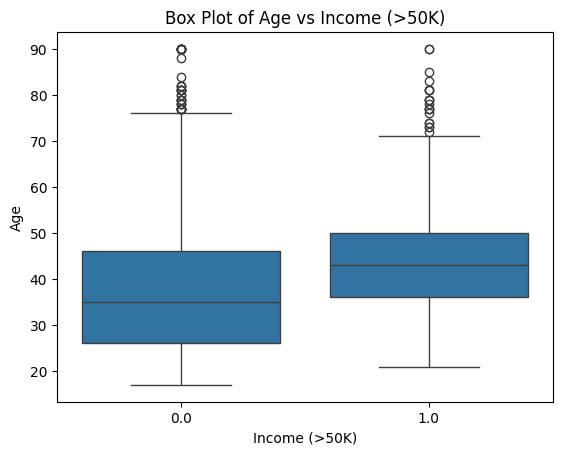

In [206]:
import seaborn as sns

# Box plot of age vs binary income_>50K
sns.boxplot(x='income_>50K', y='age', data=test_final)

# Add labels and title
plt.title('Box Plot of Age vs Income (>50K)')
plt.xlabel('Income (>50K)')
plt.ylabel('Age')

plt.show()


In [207]:
# Step 1: Calculate the Z-score for the 'age' column
test_final['age_zscore'] = (test_final['age'] - test_final['age'].mean()) / test_final['age'].std()

# Step 2: Set the threshold (Z-score greater than 3 or less than -3)
threshold = 3

# Step 3: Identify outliers
age_outliers_test = test_final[np.abs(test_final['age_zscore']) > threshold]

# Display the outliers
print(age_outliers_test.shape)


(36, 33)


In [208]:
age_outliers_test

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,race_Asian-Pac-Islander,race_Black,race_Other,race_White,gender_Male,income_>50K,occupation,education,native-country,age_zscore
547,81,55314,13,0,0,4,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,1.0,0.131103,0.401704,0.246223,3.202358
788,81,364099,10,0,0,20,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.131103,0.187757,0.246223,3.202358
904,79,84616,7,0,0,7,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.482874,0.040625,0.246223,3.051347
1147,83,153183,13,0,2392,55,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,1.0,0.482874,0.401704,0.246223,3.353369
1680,82,240491,9,0,0,40,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.229798,0.156460,0.300000,3.277864
2031,81,129338,4,0,0,10,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.194561,0.102410,0.246223,3.202358
2148,79,124744,10,0,0,20,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.421096,0.187757,0.246223,3.051347
2156,79,97082,8,18481,0,45,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,1.0,0.259121,0.093750,0.246223,3.051347
2426,81,184762,10,0,0,25,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.301242,0.187757,0.375000,3.202358
2767,90,227796,12,6097,0,45,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,1.0,0.482874,0.305994,0.246223,3.881908


In [209]:
# Step 1: Get the indices of the outliers from age_outliers
outlier_indices = age_outliers_test.index

# Step 2: Drop the outlier records from final_df based on these indices
test_final = test_final.drop(outlier_indices)

In [210]:
# Q1 = test_final['age'].quantile(0.25)
# Q3 = test_final['age'].quantile(0.75)

# # Calculate the Interquartile Range (IQR)
# IQR = Q3 - Q1

# # Define the lower and upper bounds for outliers
# lower_bound = Q1 - 1.5 * IQR
# upper_bound = Q3 + 1.5 * IQR

# test_bp_cleaned = test_final[(test_final['age'] >= lower_bound) & (test_final['age'] <= upper_bound)]

In [211]:
test_final

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,race_Asian-Pac-Islander,race_Black,race_Other,race_White,gender_Male,income_>50K,occupation,education,native-country,age_zscore
0,56,33115,9,0,0,40,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.035069,0.156460,0.246223,1.314720
1,25,112847,9,0,0,40,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.194561,0.156460,0.246223,-1.025952
2,43,170525,13,14344,0,40,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.421096,0.401704,0.246223,0.333148
3,32,186788,9,0,0,40,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.194561,0.156460,0.246223,-0.497413
4,39,277886,13,0,0,30,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.259121,0.401704,0.246223,0.031126
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9053,50,100480,14,0,0,60,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,1.0,0.482874,0.557344,0.246223,0.861687
9054,51,106728,13,5178,0,60,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,1.0,0.482874,0.401704,0.246223,0.937192
9055,25,167835,13,0,0,38,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.421096,0.401704,0.246223,-1.025952
9056,18,170194,7,0,0,25,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.259121,0.040625,0.246223,-1.554490


In [212]:
test_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9022 entries, 0 to 9057
Data columns (total 33 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   age                                   9022 non-null   int64  
 1   fnlwgt                                9022 non-null   int64  
 2   educational-num                       9022 non-null   int64  
 3   capital-gain                          9022 non-null   int64  
 4   capital-loss                          9022 non-null   int64  
 5   hours-per-week                        9022 non-null   int64  
 6   workclass_Local-gov                   9022 non-null   float64
 7   workclass_Private                     9022 non-null   float64
 8   workclass_Self-emp-inc                9022 non-null   float64
 9   workclass_Self-emp-not-inc            9022 non-null   float64
 10  workclass_State-gov                   9022 non-null   float64
 11  workclass_Without-pay 

####educational-num

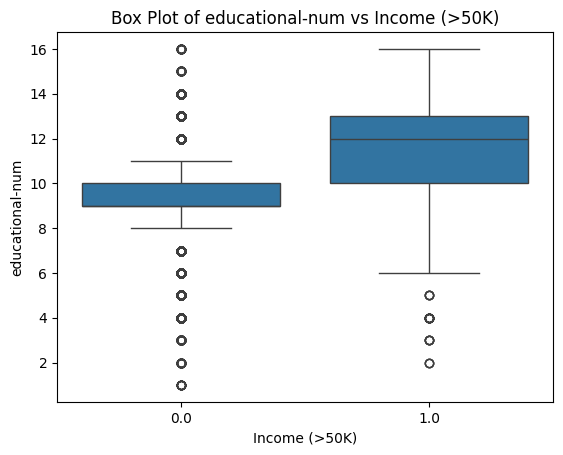

In [213]:
import seaborn as sns

# Box plot of age vs binary income_>50K
sns.boxplot(x='income_>50K', y='educational-num', data=test_final)

# Add labels and title
plt.title('Box Plot of educational-num vs Income (>50K)')
plt.xlabel('Income (>50K)')
plt.ylabel('educational-num')

plt.show()


In [214]:
# Step 1: Calculate the Z-score for the 'educational-num' column
test_final['educational-num_zscore'] = (test_final['educational-num'] - test_final['educational-num'].mean()) / test_final['educational-num'].std()

# Step 2: Set the threshold (Z-score greater than 3 or less than -3)
threshold = 3

# Step 3: Identify outliers
educational_num_outliers = test_final[np.abs(test_final['educational-num_zscore']) > threshold]

# Display the outliers
print(educational_num_outliers.shape)

(57, 34)


In [215]:
# Step 1: Get the indices of the outliers from age_outliers
outlier_indices = educational_num_outliers.index

# Step 2: Drop the outlier records from final_df based on these indices
test_final = test_final.drop(outlier_indices)

In [216]:
# Q1 = test_final['educational-num'].quantile(0.25)
# Q3 = test_final['educational-num'].quantile(0.75)

# # Calculate the Interquartile Range (IQR)
# IQR = Q3 - Q1

# # Define the lower and upper bounds for outliers
# lower_bound = Q1 - 1.5 * IQR
# upper_bound = Q3 + 1.5 * IQR

# test_bp_cleaned = test_final[(test_final['educational-num'] >= lower_bound) & (test_final['educational-num'] <= upper_bound)]

#### hours-per-week

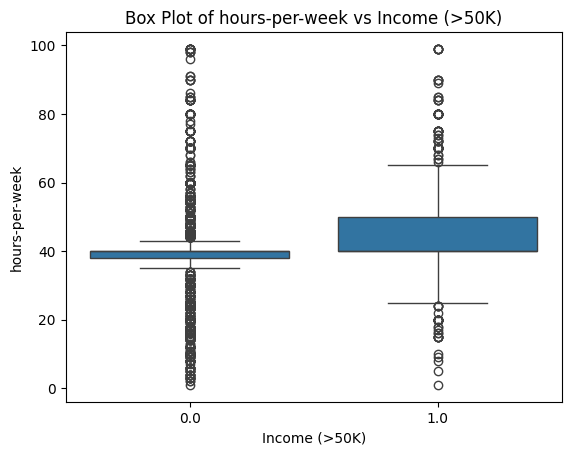

In [217]:
import seaborn as sns

# Box plot of age vs binary income_>50K
sns.boxplot(x='income_>50K', y='hours-per-week', data=test_final)

# Add labels and title
plt.title('Box Plot of hours-per-week vs Income (>50K)')
plt.xlabel('Income (>50K)')
plt.ylabel('hours-per-week')

plt.show()


In [218]:
# Step 1: Calculate the Z-score for the 'hours-per-week' column
test_final['hours-per-week_zscore'] = (test_final['hours-per-week'] - test_final['hours-per-week'].mean()) / test_final['hours-per-week'].std()

# Step 2: Set the threshold (Z-score greater than 3 or less than -3)
threshold = 3

# Step 3: Identify outliers
hpw_outliers = test_final[np.abs(test_final['hours-per-week_zscore']) > threshold]

# Display the outliers
print(hpw_outliers.shape)

(114, 35)


In [219]:
# Step 1: Get the indices of the outliers from age_outliers
outlier_indices = hpw_outliers.index

# Step 2: Drop the outlier records from final_df based on these indices
test_final = test_final.drop(outlier_indices)

In [220]:
# Q1 = test_final['hours-per-week'].quantile(0.25)
# Q3 = test_final['hours-per-week'].quantile(0.75)

# # Calculate the Interquartile Range (IQR)
# IQR = Q3 - Q1

# # Define the lower and upper bounds for outliers
# lower_bound = Q1 - 1.5 * IQR
# upper_bound = Q3 + 1.5 * IQR

# test_bp_cleaned = test_final[(test_final['hours-per-week'] >= lower_bound) & (test_final['hours-per-week'] <= upper_bound)]

In [221]:
test_final.shape
# test_bp_cleaned.shape

(8851, 35)

In [222]:
# test_final.info()

no longer need for z-score columns so lets drop them

In [223]:
test_final = test_final.drop(columns=['age_zscore', 'educational-num_zscore', 'hours-per-week_zscore'])

In [224]:
test_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8851 entries, 0 to 9057
Data columns (total 32 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   age                                   8851 non-null   int64  
 1   fnlwgt                                8851 non-null   int64  
 2   educational-num                       8851 non-null   int64  
 3   capital-gain                          8851 non-null   int64  
 4   capital-loss                          8851 non-null   int64  
 5   hours-per-week                        8851 non-null   int64  
 6   workclass_Local-gov                   8851 non-null   float64
 7   workclass_Private                     8851 non-null   float64
 8   workclass_Self-emp-inc                8851 non-null   float64
 9   workclass_Self-emp-not-inc            8851 non-null   float64
 10  workclass_State-gov                   8851 non-null   float64
 11  workclass_Without-pay 

## Feature Scaling

### Standardization

In [225]:
test_final.head()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,relationship_Wife,race_Asian-Pac-Islander,race_Black,race_Other,race_White,gender_Male,income_>50K,occupation,education,native-country
0,56,33115,9,0,0,40,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.035069,0.156460,0.246223
1,25,112847,9,0,0,40,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.194561,0.156460,0.246223
2,43,170525,13,14344,0,40,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.421096,0.401704,0.246223
3,32,186788,9,0,0,40,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.194561,0.156460,0.246223
4,39,277886,13,0,0,30,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.259121,0.401704,0.246223


In [226]:
# from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
scaler = StandardScaler()

# Apply standardization to your dataset (excluding target variable)
df_scaled_test = scaler.fit_transform(test_final.drop(columns=['income_>50K']))

# Convert back to DataFrame
x_test_scaled = pd.DataFrame(df_scaled_test, columns=test_final.drop(columns=['income_>50K']).columns)

# With No Standardization
# x_test_scaled = test_final.drop(columns=['income_>50K'])

In [227]:
x_test_scaled.head()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,relationship_Unmarried,relationship_Wife,race_Asian-Pac-Islander,race_Black,race_Other,race_White,gender_Male,occupation,education,native-country
0,1.364770,-1.467771,-0.479167,-0.147363,-0.207993,-0.048533,-0.274692,0.596185,-0.183064,-0.300935,...,2.870373,-0.225141,-0.169786,-0.337482,-0.091821,0.416794,-1.418298,-1.402628,-0.554575,0.071838
1,-1.031941,-0.717597,-0.479167,-0.147363,-0.207993,-0.048533,-0.274692,0.596185,-0.183064,-0.300935,...,-0.348387,-0.225141,-0.169786,-0.337482,10.890735,-2.399268,0.705071,-0.322717,-0.554575,0.071838
2,0.359698,-0.174923,1.150774,1.725980,-0.207993,-0.048533,-0.274692,0.596185,-0.183064,-0.300935,...,-0.348387,-0.225141,-0.169786,-0.337482,-0.091821,0.416794,-1.418298,1.211141,1.020596,0.071838
3,-0.490748,-0.021909,-0.479167,-0.147363,-0.207993,-0.048533,-0.274692,0.596185,-0.183064,-0.300935,...,-0.348387,-0.225141,-0.169786,-0.337482,-0.091821,0.416794,0.705071,-0.322717,-0.554575,0.071838
4,0.050444,0.835203,1.150774,-0.147363,-0.207993,-0.988087,-0.274692,0.596185,-0.183064,-0.300935,...,-0.348387,4.441659,-0.169786,-0.337482,-0.091821,0.416794,-1.418298,0.114416,1.020596,0.071838


### Normalization

In [228]:
# from sklearn.preprocessing import MinMaxScaler

# # Initialize MinMaxScaler for normalization
# scaler = MinMaxScaler()

# # Apply normalization to your dataset (excluding the target variable)
# df_normalized = scaler.fit_transform(test_final.drop(columns=['income_>50K']))

# # Convert back to DataFrame
# x_test_scaled = pd.DataFrame(df_normalized, columns=test_final.drop(columns=['income_>50K']).columns)


In [229]:
y_test = test_final['income_>50K']

## Feature Engineering

In [230]:
x_test_scaled_2= x_test_scaled.drop(columns=['education'])


In [231]:
# Define the columns to drop
columns_to_drop = ['workclass_State-gov', 'fnlwgt','workclass_Without-pay']

# Drop the columns from the DataFrame
x_test_scaled_2 = x_test_scaled_2.drop(columns=columns_to_drop)

In [232]:
print(x_train_scaled_2.shape)
print(y_train.shape)
print(x_test_scaled_2.shape)
print(y_test.shape)

(35278, 27)
(35278,)
(8851, 27)
(8851,)


In [233]:
# x_train_scaled_2.info()

#### Combining Features

In [234]:
# # Option 1: Combine 'capital-gain' and 'capital-loss' into a single 'net_capital' feature
# x_test_scaled_2['net_capital'] = x_test_scaled_2['capital-gain'] * x_test_scaled_2['capital-loss']

# # Drop the original 'capital-gain' and 'capital-loss' columns
# x_test_scaled_3 = x_test_scaled_2.drop(columns=['capital-gain', 'capital-loss'])

In [235]:
# # Define the columns that are considered 'Married' and 'Not-Married'
# married_columns = ['marital-status_Married-AF-spouse', 'marital-status_Married-civ-spouse', 'marital-status_Married-spouse-absent']
# not_married_columns = ['marital-status_Never-married', 'marital-status_Separated', 'marital-status_Widowed']

# # Create the 'marital_group' column
# x_test_scaled_2['marital_group'] = x_test_scaled_2[married_columns].sum(axis=1).apply(lambda x: 'Married' if x > 0 else 'Not-Married')

# # Drop the original six marital status columns
# x_test_scaled_3 = x_test_scaled_2.drop(columns=married_columns + not_married_columns)

In [236]:
# # Apply OneHotEncoder to the 'marital_group' column
# encoder = OneHotEncoder(drop='first', sparse_output=False)  # Use sparse_output=False for dense output
# encoded_marital_group = encoder.fit_transform(x_test_scaled_3[['marital_group']])

# #Convert the encoded marital group to a DataFrame
# x_test_scaled_3['is_married'] = encoded_marital_group

# # Drop the original 'marital_group' column
# x_test_scaled_3 = x_test_scaled_3.drop(columns=['marital_group'])

In [237]:
# x_test_scaled_3.info()

## Applying Models

### logistic regression

In [238]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

logReg = LogisticRegression()
logReg.fit(x_train_scaled_2, y_train)
y_pred_log_reg = logReg.predict(x_test_scaled_2)


In [239]:
f1_log_reg = f1_score(y_test, y_pred_log_reg)
# Display the F1 scores
print(f"F1 Score for Logistic Regression: {f1_log_reg}")

F1 Score for Logistic Regression: 0.6727318675764468


In [240]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred_log_reg)
print(f"Accuracy with  kernel: {accuracy:.4f}")

Accuracy with  kernel: 0.8537


###SVM

In [245]:
from sklearn.svm import SVC

svm_model = SVC(kernel='linear')
svm_model.fit(x_train_scaled_2, y_train)
y_pred_svm = svm_model.predict(x_test_scaled_2)

f1_svm = f1_score(y_test, y_pred_svm)

print(f"F1 Score for SVM: {f1_svm}")

F1 Score for SVM: 0.6687211093990755


In [246]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred_svm)
print(f"Accuracy with  kernel: {accuracy:.4f}")

Accuracy with  kernel: 0.8543
